In [16]:
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt

unemployment = pd.read_csv('Data/clean_unemployment.csv')


In [6]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  182 non-null    object 
 1   country_name  182 non-null    object 
 2   continent     177 non-null    object 
 3   2010          182 non-null    float64
 4   2011          182 non-null    float64
 5   2012          182 non-null    float64
 6   2013          182 non-null    float64
 7   2014          182 non-null    float64
 8   2015          182 non-null    float64
 9   2016          182 non-null    float64
 10  2017          182 non-null    float64
 11  2018          182 non-null    float64
 12  2019          182 non-null    float64
 13  2020          182 non-null    float64
 14  2021          182 non-null    float64
dtypes: float64(12), object(3)
memory usage: 21.5+ KB


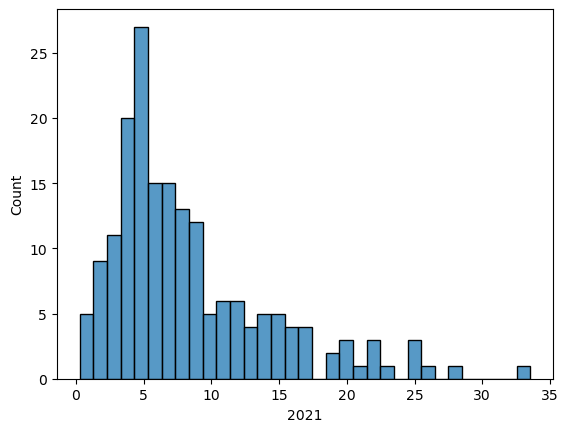

In [21]:
sns.histplot(unemployment, x='2021', binwidth=1)
plt.show()

In [32]:
not_oceania = ~unemployment['continent'].isin(['Oceania'])

unemployment[not_oceania].head(10)

,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90
5,ARM,Armenia,Asia,19.01,18.44,17.30,16.18,17.50,18.26,17.62,17.70,18.97,18.30,21.21,20.90
7,AUT,Austria,Europe,4.82,4.56,4.87,5.33,5.62,5.72,6.01,5.50,4.85,4.49,5.36,6.30
8,AZE,Azerbaijan,Asia,5.63,5.42,5.19,4.97,4.91,4.96,5.00,5.00,4.90,4.85,6.46,6.58
9,BDI,Burundi,Africa,1.61,1.60,1.59,1.58,1.57,1.60,1.59,1.59,1.59,1.59,1.71,1.79
10,BEL,Belgium,Europe,8.29,7.14,7.54,8.43,8.52,8.48,7.83,7.09,5.95,5.36,5.55,6.42


0.26 33.56


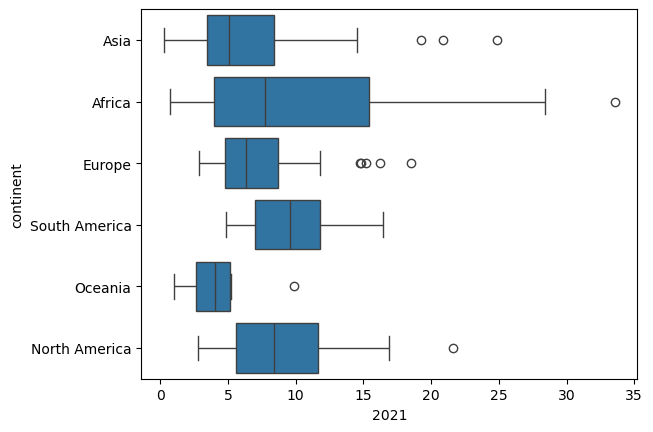

In [35]:
yr_2021 = unemployment['2021']

print(yr_2021.min(), yr_2021.max())

sns.boxplot(unemployment, x='2021', y='continent')
plt.show()

In [40]:
continent_summary = unemployment.groupby('continent').agg(
    mean_rate_2021=('2021','mean'),
    std_rate_2021=('2021', 'std')
)

continent_summary

,mean_rate_2021,std_rate_2021
continent,,
Africa,10.473585,8.131636
Asia,6.906170,5.414745
Europe,7.414872,3.947825
North America,9.155000,5.076482
Oceania,4.280000,2.671522
South America,9.924167,3.611624


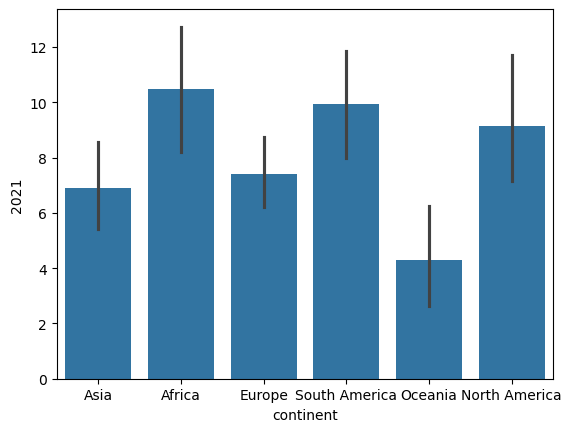

In [63]:
sns.barplot(unemployment, x='continent', y='2021')
plt.show()

In [90]:
unemployment.columns[unemployment.isna().sum() > 0]

Index([], dtype='object')

In [101]:
cols_with_na = unemployment.loc[unemployment['continent'].isna(), ['country_name', 'continent']]

cols_with_na


,country_name,continent


In [127]:
planes = pd.read_csv('Data/planes.csv')

In [128]:
planes.isna().sum()

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64

In [129]:
# generally, missing values to be dropped typically account for 5% of the total data
threshold = planes.shape[0] * 0.05

cols_to_drop = planes.columns[planes.isna().sum() <= threshold]
planes.dropna(subset=cols_to_drop, inplace=True)

In [130]:
planes.isna().sum()

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64

In [131]:
planes['Additional_Info'].value_counts()

Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

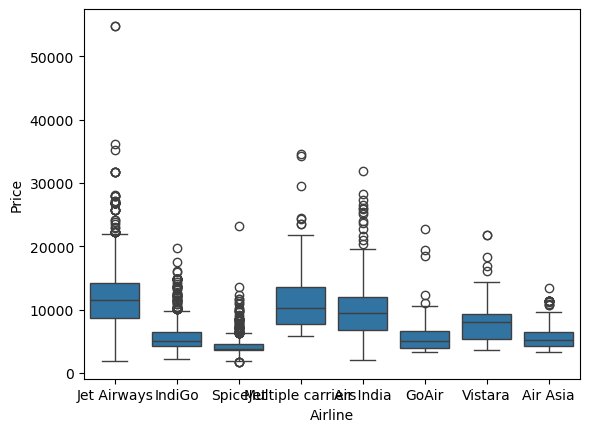

In [132]:
sns.boxplot(planes, y='Price', x='Airline')
plt.show()

In [133]:
planes = planes.drop(columns='Additional_Info', axis=1)

In [134]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,11087.0


In [144]:
# calculating median price per airline and converting it to a dictionary for imputation
airline_prices = planes.groupby('Airline')['Price'].agg('median')
prices_dict = airline_prices.to_dict()

# mapping the missing prices using the dictionary for each airline
# 'inplace = True' may also be used instead of reassigning to the dataframe

planes['Price'] = planes['Price'].fillna(planes['Airline'].map(prices_dict))

planes.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64